binary logistic regression

Accuracy: 0.90


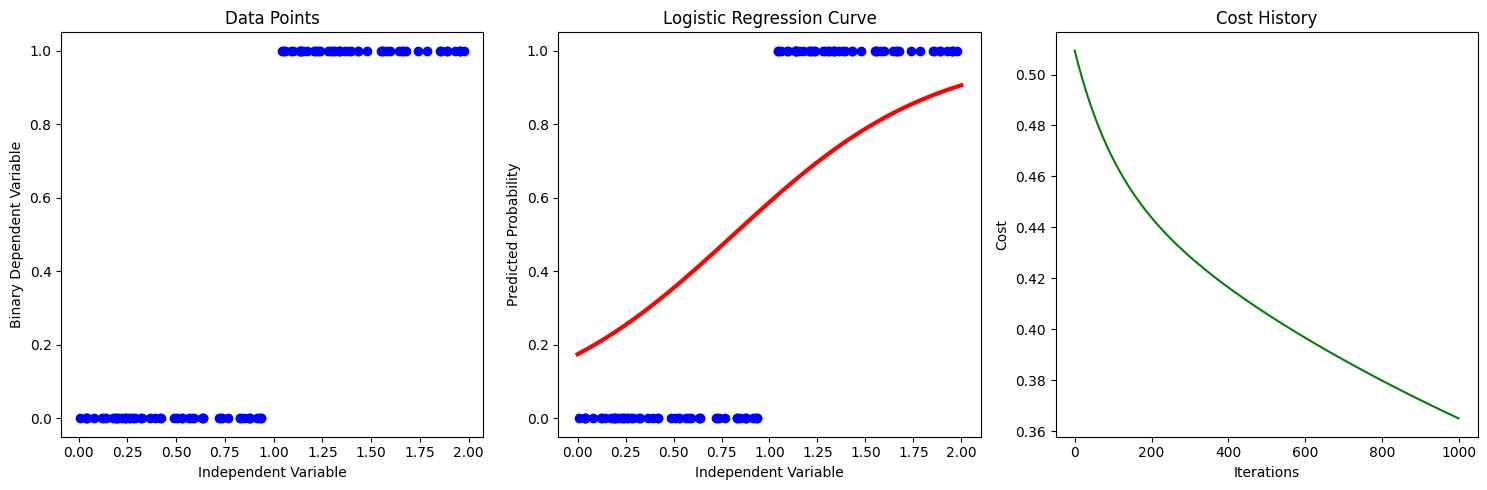

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data for demonstration
np.random.seed(0)
n_samples = 100
X = 2 * np.random.rand(n_samples, 1)  # Independent variable
y = (X > 1.0).astype(int)  # Binary dependent variable (1 if X > 1.0, else 0)

# Add a column of ones for the bias term (intercept)
X_b = np.c_[np.ones((n_samples, 1)), X]

# Define the number of iterations and learning rate for gradient descent
num_iterations = 1000
learning_rate = 0.01

# Initialize the parameters (theta0 and theta1)
theta = np.random.randn(X_b.shape[1], 1)  # Ensure theta is a column vector

# List to store the cost history for visualization
cost_history = []

# Sigmoid function (logistic function)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hypothesis function (logistic model)
def hypothesis(theta, X):
    return sigmoid(np.dot(X, theta))

# Cost function (cross-entropy loss)
def cost_function(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    return -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradient Descent function
def gradient_descent(theta, X, y, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        h = hypothesis(theta, X)
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= learning_rate * gradient
        cost = cost_function(theta, X, y)
        cost_history.append(cost)
    return theta

# Perform gradient descent to find the optimal parameters
theta = gradient_descent(theta, X_b, y, learning_rate, num_iterations)

# Model evaluation
y_pred = (hypothesis(theta, X_b) >= 0.5).astype(int)
accuracy = np.mean(y_pred == y)

print(f"Accuracy: {accuracy:.2f}")

# Plot the data, logistic regression curve, and cost history
plt.figure(figsize=(15, 5))

# Plot the data points
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue')
plt.xlabel('Independent Variable')
plt.ylabel('Binary Dependent Variable')
plt.title('Data Points')

# Plot the logistic regression curve
plt.subplot(1, 3, 2)
plt.scatter(X, y, color='blue')
X_plot = np.linspace(0, 2, 100)
y_plot = sigmoid(np.dot(np.c_[np.ones((100, 1)), X_plot], theta))
plt.plot(X_plot, y_plot, color='red', linewidth=3)
plt.xlabel('Independent Variable')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Curve')

# Plot the cost history
plt.subplot(1, 3, 3)
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')

plt.tight_layout()
plt.show()




multiclass logistic regression

Accuracy: 0.43


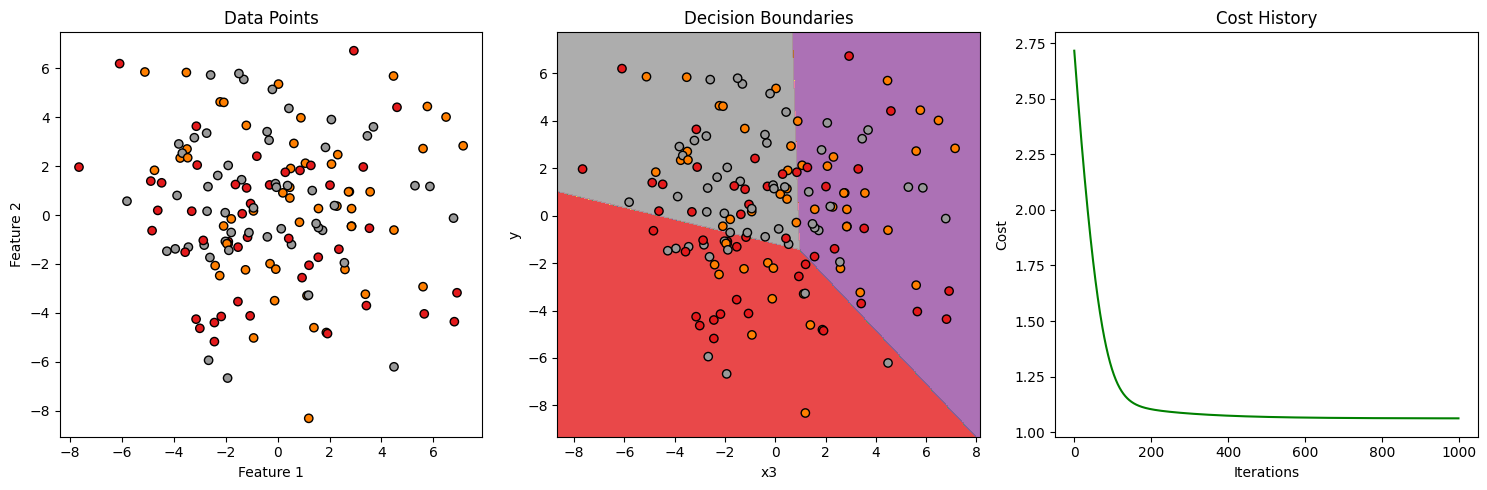

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data for demonstration (three classes)
np.random.seed(0)
n_samples = 150
X = 3 * np.random.randn(n_samples, 2)  # Independent variables
y = np.random.randint(0, 3, size=n_samples)  # Multiclass dependent variable (3 classes)

# Add a column of ones for the bias term (intercept)
X_b = np.c_[np.ones((n_samples, 1)), X]

# Define the number of iterations and learning rate for gradient descent
num_iterations = 1000
learning_rate = 0.01

# Number of classes
num_classes = len(np.unique(y))

# Number of features (including bias)
n_features = X_b.shape[1]

# Initialize the parameters (theta for each class)
theta = np.random.randn(num_classes, n_features)

# List to store the cost history for visualization
cost_history = []

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# One-hot encode the class labels
y_one_hot = np.zeros((n_samples, num_classes))
y_one_hot[np.arange(n_samples), y] = 1

# Hypothesis function (multiclass logistic model)
def hypothesis(theta, X):
    return softmax(np.dot(X, theta.T))

# Cost function (cross-entropy loss)
def cost_function(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    return -(1 / m) * np.sum(y * np.log(h))

# Gradient Descent function
def gradient_descent(theta, X, y, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        h = hypothesis(theta, X)
        gradient = -(1 / m) * np.dot((y - h).T, X)
        theta -= learning_rate * gradient
        cost = cost_function(theta, X, y)
        cost_history.append(cost)
    return theta

# Perform gradient descent to find the optimal parameters
theta = gradient_descent(theta, X_b, y_one_hot, learning_rate, num_iterations)

# Model evaluation
y_pred_probs = hypothesis(theta, X_b)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = np.mean(y_pred == y)

print(f"Accuracy: {accuracy:.2f}")

# Plot the data, decision boundaries, and cost history
plt.figure(figsize=(15, 5))

# Plot the data points
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points')

# Plot the decision boundaries
plt.subplot(1, 3, 2)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = np.argmax(hypothesis(theta, np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, marker='o', edgecolor='k')
plt.xlabel('x1')
plt.xlabel('x2')
plt.xlabel('x3')
plt.ylabel('y')
plt.title('Decision Boundaries')

# Plot the cost history
plt.subplot(1, 3, 3)
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')

plt.tight_layout()
plt.show()


